# Stroke Predictions using Machine Learning

### By Derek Lilienthal

Data: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

**Context**  
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information**  
1) id: unique identifier  
2) gender: "Male", "Female" or "Other"  
3) age: age of the patient  
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension  
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease  
6) ever_married: "No" or "Yes"  
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"  
8) Residence_type: "Rural" or "Urban"  
9) avg_glucose_level: average glucose level in blood  
10) bmi: body mass index  
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"\*   
12) stroke: 1 if the patient had a stroke or 0 if not  
\*Note: "Unknown" in smoking_status means that the information is unavailable for this patient  

<hr>

**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Global Parameters**

In [45]:
font_size = 22
plt.rcParams.update({'font.size': font_size})
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(color_codes=True)
sns.set(font_scale=2)

**Import Data**

In [261]:
# Import all the columns except for the ID column
df = pd.read_csv("healthcare-dataset-stroke-data.csv", usecols = np.arange(1,12))

### Data Summarization

*General Information about the Data Set*

In [177]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   string 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   Int64  
 3   heart_disease      5110 non-null   Int64  
 4   ever_married       5110 non-null   string 
 5   work_type          5110 non-null   string 
 6   Residence_type     5110 non-null   string 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   string 
 10  stroke             5110 non-null   Int64  
dtypes: Int64(3), float64(3), string(5)
memory usage: 454.2 KB


*Top 5 rows in the data set*

In [178]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


*Number of Observations (rows) and Features (columns)*

In [179]:
df.shape

(5110, 11)

*Summary Statistics of Numeric Columns*

In [180]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


*Summary Statistics of Categorical Columns*

In [181]:
df.describe(include=['string'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


*Missing Values in the dataset*

In [182]:
is_missing = df.isna().sum()
percent_missing = (df.isna().sum() / df.shape[0]) * 100
result = pd.concat([is_missing, percent_missing], axis=1)
result.rename(columns={0:"Missing Counts",1:"Percentage Missing"})

,Missing Counts,Percentage Missing
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
bmi,201,3.933464
smoking_status,0,0.000000


### Data Exploration

*Categorizing features*

In [197]:
categorical_columns = []
numeric_columns = []
for i in range(df.shape[1]):
    dtype = str(df.dtypes[i])
    if dtype == 'string':
        categorical_columns.append(df.columns[i])
    else:
        numeric_columns.append(df.columns[i])

*Below shows how many unique values there are for each feature in the data set*

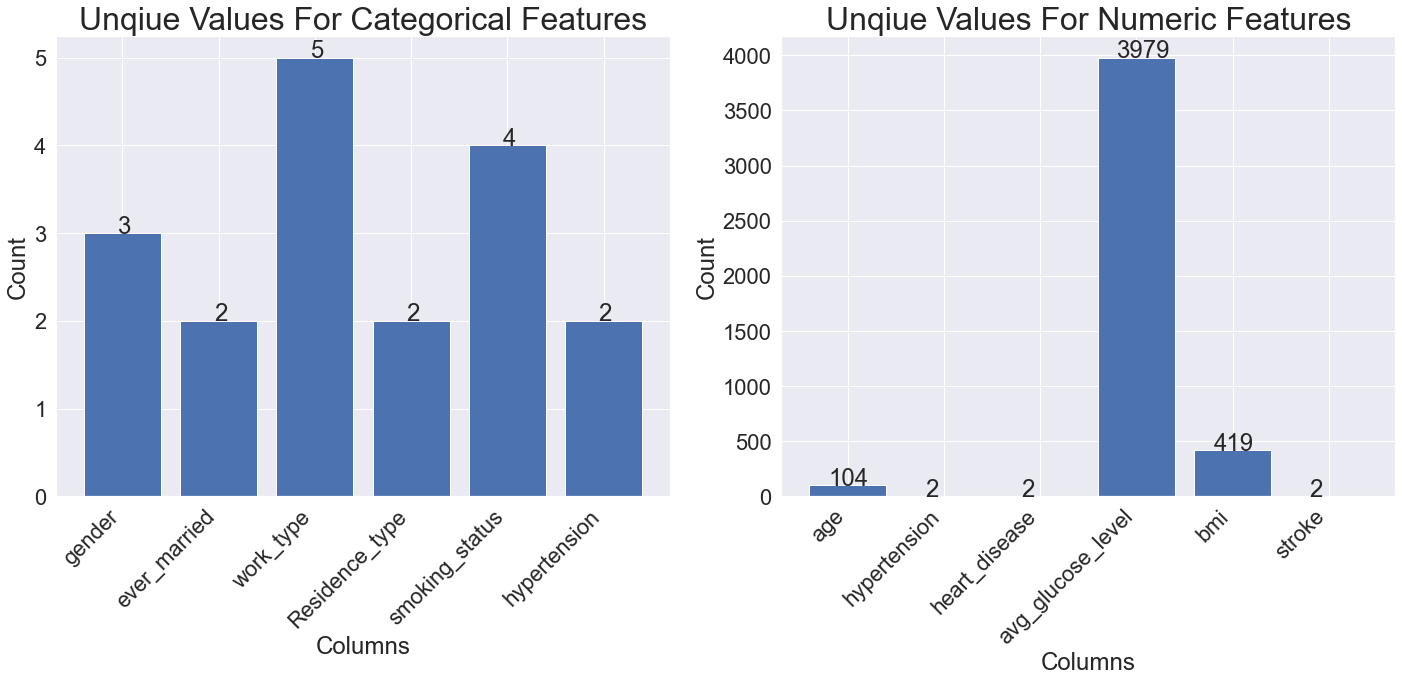

In [195]:
cat_dict = {}
for col in categorical_columns:
    cat_dict[col] = df[col].unique().size
    
num_dict = {}
for col in numeric_columns:
    num_dict[col] = df[col].unique().size

fig, (ax1, ax2) = plt.subplots(1,2, sharex=False, sharey=False)

# Code for left graph
plt.sca(ax1)
plt.bar(x=cat_dict.keys(), height=cat_dict.values())
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Unqiue Values For Categorical Features', fontsize=font_size+10)
plt.xlabel('Columns')
plt.ylabel('Count')
for i, col in enumerate(ax1.patches):
    plt.text(col.get_x()+0.35, col.get_height(), list(cat_dict.values())[i]);

# Code for right graph
plt.sca(ax2)
plt.bar(x=num_dict.keys(), height=num_dict.values())
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Unqiue Values For Numeric Features', fontsize=font_size+10)
plt.xlabel('Columns')
plt.ylabel('Count')
for i, col in enumerate(ax2.patches):
    plt.text(col.get_x()+0.2, col.get_height(), list(num_dict.values())[i]);
    
plt.tight_layout()

From the left graph, we can see **hypertension**, **heart_disease**, and **stroke** are categorical features that are encoded as numeric.

*Distribution of Non-Binary Numeric Data*

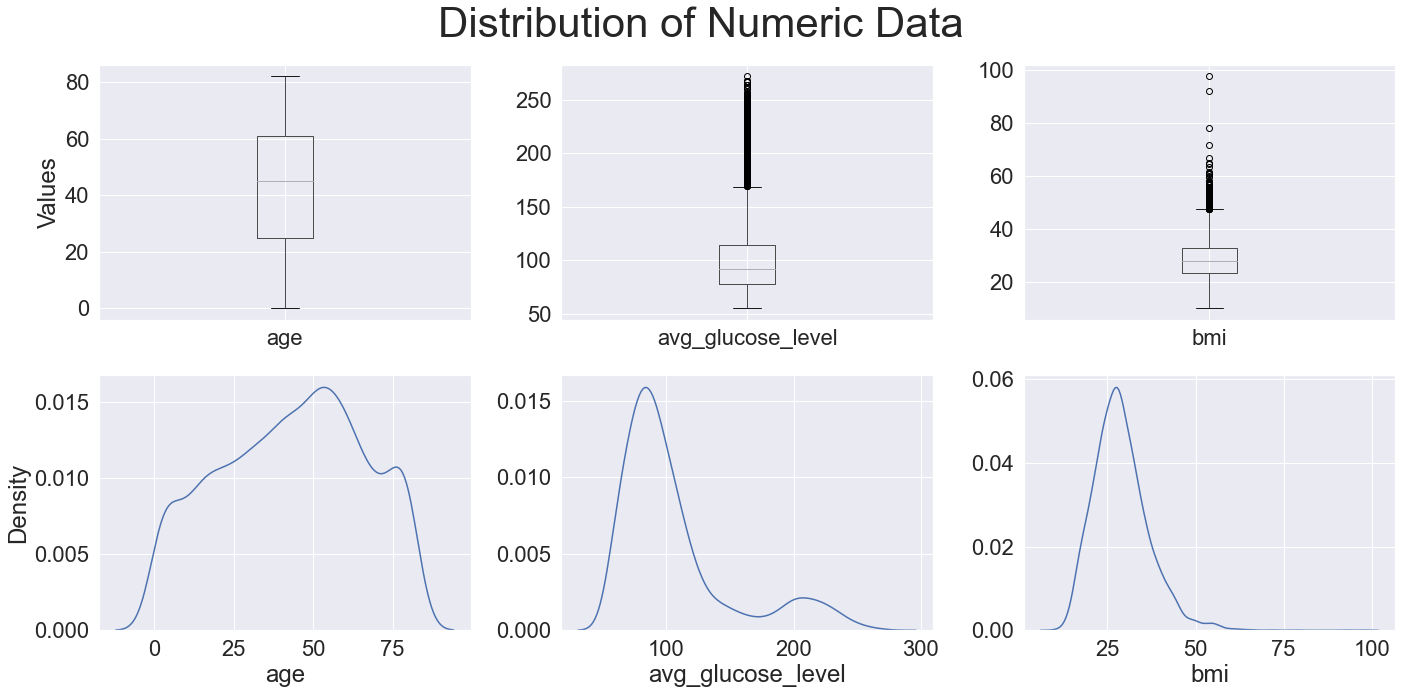

In [185]:
fig, axes = plt.subplots(2, 3, sharex=False, sharey=False)

df.boxplot(['age'], ax=axes[0,0]).set(ylabel="Values")
df.boxplot(['avg_glucose_level'], ax=axes[0,1])
df.boxplot(['bmi'], ax=axes[0,2])
sns.kdeplot(df['age'], ax=axes[1,0]) 
sns.kdeplot(df['avg_glucose_level'], ax=axes[1,1]).set(ylabel=None)
sns.kdeplot(df['bmi'], ax=axes[1,2]).set(ylabel=None) 
plt.tight_layout()
plt.suptitle("Distribution of Numeric Data", fontsize = font_size + 20)
plt.subplots_adjust(top = 0.9)

*Distribution of all categorical columns*

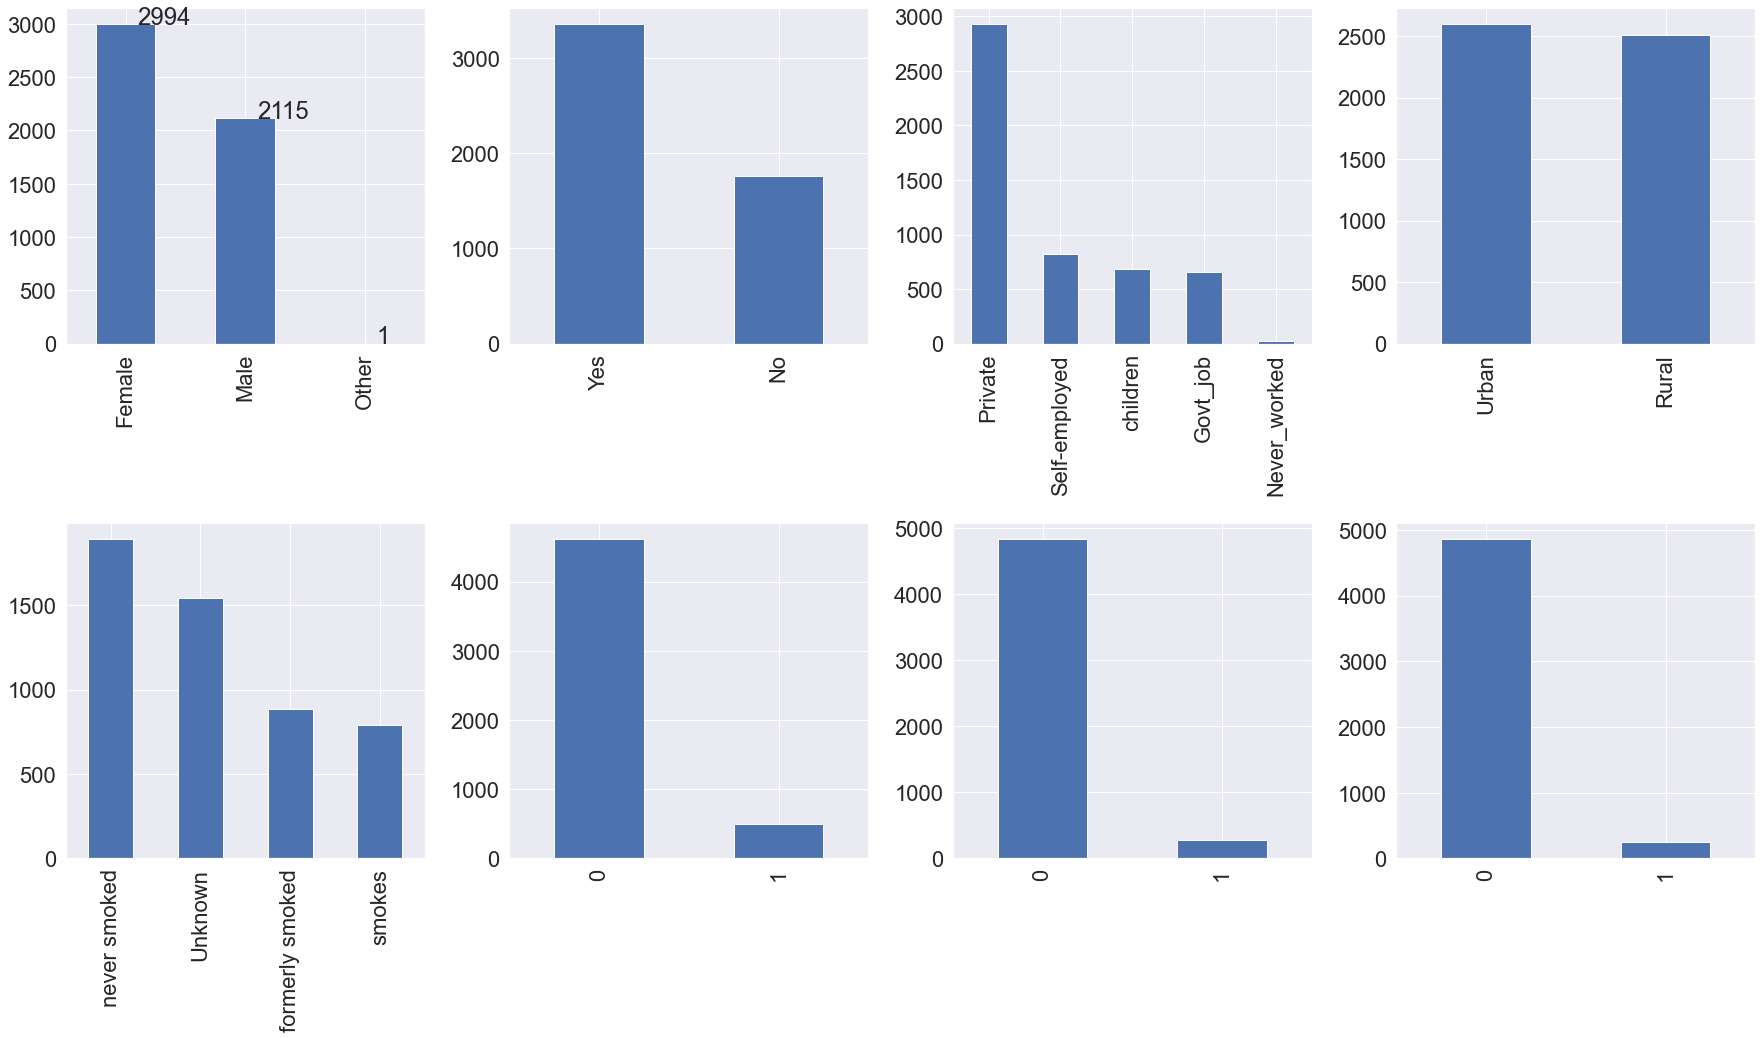

In [211]:
numeric_categorical_columns = ['hypertension', 'heart_disease', 'stroke']
all_categorical_columns = categorical_columns + numeric_categorical_columns

fig, axes = plt.subplots(2, 4, sharex=False, sharey=False, figsize=(25,15))

df['gender'].value_counts().plot.bar(ax=axes[0,0])
plt.sca(axes[0,0])
for i, col in enumerate(axes[0,0].patches):
    plt.text(col.get_x()+0.35, col.get_height(), df['gender'].value_counts().tolist()[i]);
df['ever_married'].value_counts().plot.bar(ax=axes[0,1])
df['work_type'].value_counts().plot.bar(ax=axes[0,2])
df['Residence_type'].value_counts().plot.bar(ax=axes[0,3])
df['smoking_status'].value_counts().plot.bar(ax=axes[1,0])
df['hypertension'].value_counts().plot.bar(ax=axes[1,1])
df['heart_disease'].value_counts().plot.bar(ax=axes[1,2])
df['stroke'].value_counts().plot.bar(ax=axes[1,3])

plt.tight_layout()

In [201]:
all_categorical_columns

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'hypertension',
 'heart_disease',
 'stroke']

In [198]:
categorical_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

### Preprocessing and Cleaning

*Drop all missing data*

In [276]:
df = df.dropna().copy()

*Encode all data as numeric*

In [281]:
gender_le = LabelEncoder()
ever_married_le = LabelEncoder()
work_type_le = LabelEncoder()
Residence_type_le = LabelEncoder()
smoking_status_le = LabelEncoder()

df['gender'] = gender_le.fit_transform(df['gender']).reshape(-1,1)
df['ever_married'] = ever_married_le.fit_transform(df['ever_married']).reshape(-1,1)
df['work_type'] = work_type_le.fit_transform(df['work_type']).reshape(-1,1)
df['Residence_type'] = Residence_type_le.fit_transform(df['Residence_type']).reshape(-1,1)
df['smoking_status'] = smoking_status_le.fit_transform(df['smoking_status']).reshape(-1,1)

In [282]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


### Machine Learning

**Logistic Regression** (Full Model)

In [336]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score

In [329]:
predictors = df.columns[:10]
target = 'stroke'

X = df[predictors].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [331]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

y_predict = reg.predict(X_test)

accuracy = (y_predict == y_test)

In [332]:
accuracy.mean()

0.9562118126272913

An accuracy of 95% is impressive! But because the dataset is unbalanced, let's check some other metrics like precision and recall.

In [357]:
def print_precision_recall_f1(y_test, y_predict):
    true_positive = sum((y_test == 1) & (y_predict == 1))
    true_negative = sum((y_test == 0) & (y_predict == 0))
    false_negative = sum((y_test == 1) & (y_predict == 0))
    false_positive = sum((y_test == 0) & (y_predict == 1))

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall != 0) else 0

    print("True Positive {}".format(true_positive))    
    print("True Negative {}".format(true_negative))  
    print("False Negative {}".format(false_negative))     
    print("False Positive {}".format(false_positive))  
    print("Precision {}".format(precision))
    print("Recall {}".format(recall))
    print("F1 Score {}".format(f1_score))

print_precision_recall_f1(y_test, y_predict)

True Positive 0
True Negative 939
False Negative 43
False Positive 0
Precision 0
Recall 0.0
F1 Score 0
